In [582]:
import numpy as np
import pandas as pd
 
# be sure to change the file path
# if you have the dataset in another
# directly than the working folder
df = pd.read_csv('~/UW/IMT_574/Week9/Homework/winequality-red.csv', sep=';')
 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [583]:
import tensorflow as tf
 
# 75% of the data is selected
train_df = df.sample(frac=0.75, random_state=4) 
 
# it drops the training data
# from the original dataframe
val_df = df.drop(train_df.index)

In [584]:
# calling to (0,1) range
max_val = train_df.max(axis= 0)
min_val = train_df.min(axis= 0)
 
range = max_val - min_val
train_df = (train_df - min_val)/(range)
 
val_df =  (val_df- min_val)/range

In [585]:
# now let's separate the targets and labels
X_train = train_df.drop('quality',axis=1)
X_val = val_df.drop('quality',axis=1)
y_train = train_df['quality']
y_val = val_df['quality']
 


In [586]:
# We'll need to pass the shape
# of features/inputs as an argument
# in our model, so let's define a variable 
# to save it.
input_shape = [X_train.shape[1]]
 
input_shape

[11]

In [587]:
model = tf.keras.Sequential([
tf.keras.layers.Dense(units=1,input_shape=input_shape)])
 
# after you create your model it's
# always a good habit to print out it's summary
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_85 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

In [588]:
model = tf.keras.Sequential([
 
    tf.keras.layers.Dense(units=64, activation='relu',
                          input_shape=input_shape),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
model.summary()

Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_86 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,993 (19.50 KB)

 Trainable params: 4,993 (19.50 KB)

 Non-trainable params: 0 (0.00 B)

In [589]:
# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model.compile(optimizer='adam',  
               
              # MAE error is good for
              # numerical predictions
              loss='mae') 

In [590]:
losses = model.fit(X_train, y_train,
 
                   validation_data=(X_val, y_val),
                    
                   # it will use 'batch_size' number
                   # of examples per example
                   batch_size=256, 
                   epochs=15,  # total epoch
 
                   )

Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.3925 - val_loss: 0.2118
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1801 - val_loss: 0.1513
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1652 - val_loss: 0.1708
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1733 - val_loss: 0.1398
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1459 - val_loss: 0.1375
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1423 - val_loss: 0.1376
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1376 - val_loss: 0.1269
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1288 - val_loss: 0.1239
Epoch 9/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1276 - val_loss: 0.1208
Epoch 10/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1225 - val_loss: 0.1166
Epoch 11/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1168 - val_loss: 0.1142
Epoch 12/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1131 - val_loss: 0.1124
Epoch 13/15


In [591]:
# this will pass the first 3 rows of features
# of our data as input to make predictions
model.predict(X_val.iloc[:3, :])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[0.4199674 ],
       [0.5090975 ],
       [0.45749444]], dtype=float32)

In [592]:
y_val.iloc[0:3]

0     0.4
9     0.4
12    0.4
Name: quality, dtype: float64

<Axes: >

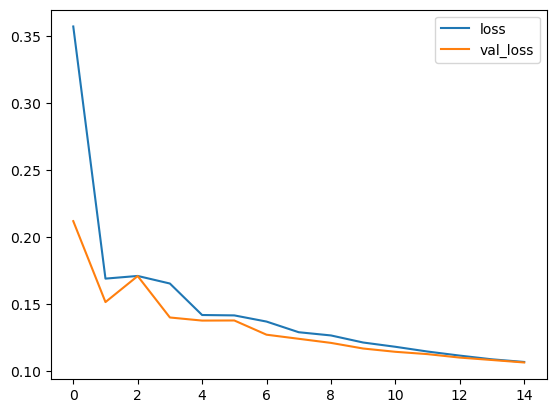

In [593]:
loss_df = pd.DataFrame(losses.history)
 
# history stores the loss/val
# loss in each epoch
 
# loss_df is a dataframe which
# contains the losses so we can
# plot it to visualize our model training
loss_df.loc[:,['loss','val_loss']].plot()